In [2]:
from sklearn.datasets import load_boston
data = load_boston()
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [3]:
X = data['data']
X_rm = X[:, 5]
Y = data['target']

In [42]:
import numpy as np
import random

In [55]:
a = np.array([[1, 2, 3],
       [4, 5, 6]])
a

array([[1, 2, 3],
       [4, 5, 6]])

In [58]:
np.cumsum(a, axis=0, dtype=np.int)

array([[1, 2, 3],
       [5, 7, 9]], dtype=int32)

In [78]:
np.cumsum(a, axis=1)

array([[ 1,  3,  6],
       [ 4,  9, 15]], dtype=int32)

In [80]:
np.cumsum(a)

array([ 1,  3,  6, 10, 15, 21], dtype=int32)

In [83]:
np.sum(a, axis=1)

array([ 6, 15])

In [112]:
np.random.seed(1)
theta_0 = np.random.randn() * 200 - 100
theta_1 = np.random.randn() * 200 - 100

In [113]:
theta_0, theta_1

(224.8690727326483, -222.35128273001507)

In [114]:
np.random.seed(1)
theta_3 = np.random.randn() * 200 - 100
theta_4 = np.random.randn() * 200 - 100
theta_3, theta_4

(224.8690727326483, -222.35128273001507)

## 1.Random with nothing

In [130]:
# del best_theta_0, best_theta_1
theta_0 = 100
theta_1 = 100
min_loss = float('inf')
flag = 1
count = 0
while flag:
    count += 1
    y_hat = X_rm * theta_1 + theta_0
    current_loss = np.sum(np.square(Y - y_hat)) / len(Y)
    if min_loss > current_loss:
        flag = 0 if (min_loss - current_loss < .1) else 1
        min_loss = current_loss
        best_theta_1, best_theta_0 = theta_1, theta_0
    if count % 10000 == 0:
        print(f"current loss {current_loss}")
    theta_0 = random.random() * 200 - 100
    theta_1 = random.random() * 200 - 100
    
print(f"Sequence {count}: with loss {min_loss} when theta_1 = {best_theta_1}, theta_0 = {best_theta_0}")

current loss 160461.79113235523
current loss 96529.97677887455
current loss 16750.813451234477
current loss 27386.01880576471
current loss 8280.336400591388
Sequence 57349: with loss 43.88216812932692 when theta_1 = 8.556675789981298, theta_0 = -30.875293568458332


-94.37074016343175 65.3357226074194


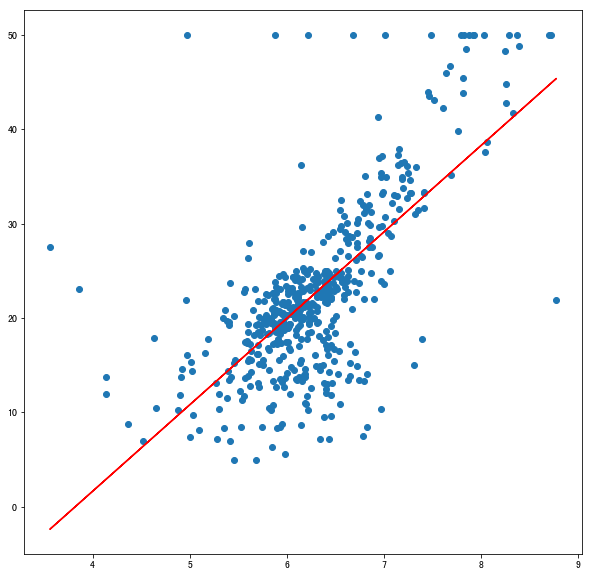

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
best_y_hat = X_rm * best_theta_1 + best_theta_0
print(theta_1, theta_0)
plt.figure(figsize=(10,10))
plt.scatter(X_rm, Y)
plt.plot(X_rm, best_y_hat, color='red')
plt.show()

## 2.Random with direction calibration
> 表现还不如Random with nothing

In [128]:
theta_0 = 100
theta_1 = 100
direction = [
    (1, 1),
    (1, -1),
    (-1, 1),
    (-1, -1)
]
scalar = .1
min_loss = float('inf')
new_direction = random.choice(direction)
count = 0
flag = 1
while flag:
    if count % 100000 == 0:
        print(f"current loss {current_loss}")
    count += 1
#     print(theta_0, theta_1)
    new_0, new_1 = new_direction
    theta_0, theta_1 = theta_0 + scalar * new_0, theta_1 + scalar * new_1
    
    y_hat = X_rm * theta_1 + theta_0
    current_loss = np.sum(np.square(Y - y_hat)) / len(Y)
    
    if min_loss > current_loss:
        flag = 0 if min_loss - current_loss < .1 else 1
        min_loss = current_loss
#         print(theta_0, theta_1)
    else:
        new_direction = random.choice(direction)
    
    
print(f"Sequence {count}: with loss {min_loss} when theta_1 = {best_theta_1}, theta_0 = {best_theta_0}")

current loss 204304.75568419736
Sequence 969: with loss 61.352506983530255 when theta_1 = 9.209101739990572, theta_0 = -35.23063139725508


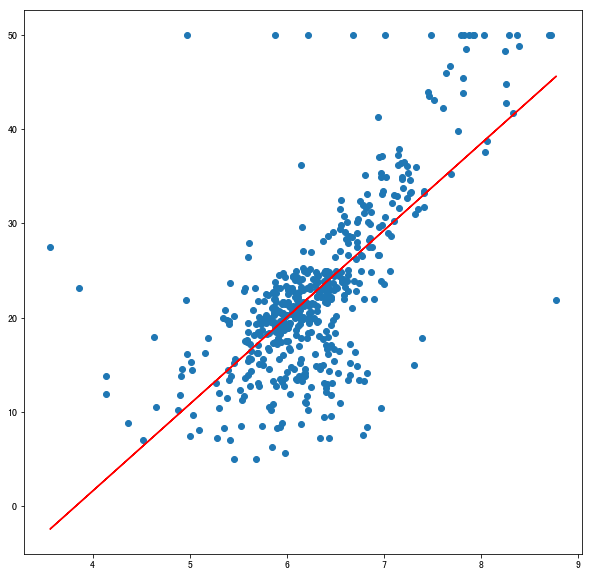

In [129]:
best_y_hat = X_rm * best_theta_1 + best_theta_0
plt.figure(figsize=(10,10))
plt.scatter(X_rm, Y)
plt.plot(X_rm, best_y_hat, color='red')
plt.show()

## 3.Gradient descent with square loss function

In [9]:
learning_rate = random.random() / 10000
learning_rate

2.81706400282141e-05

In [152]:
# %%time
learning_rate = 1 / 1000
theta_0 = 100
theta_1 = 100
min_loss = float('inf')
update_count = 0
flag = 1

while flag:
    update_count += 1
    y_hat = X_rm * theta_1 + theta_0
    current_loss = np.sum(np.square(Y - y_hat)) / len(Y)
    if min_loss > current_loss:
        difference = min_loss - current_loss
        if update_count % 10000 == 0:
            print(f"{update_count} iteration: with loss {min_loss} : theta_1 = {theta_1}, theta_0 = {theta_0}")            
        min_loss = current_loss    
        
    theta_1 = theta_1 - learning_rate * 2 * np.sum((y_hat - Y) * X_rm) / len(Y)
    theta_0 = theta_0 - learning_rate * 2 * np.sum(y_hat - Y) / len(Y)
    
    if difference <= 0.000001:
        flag = 0
print(f"{update_count} iterations with min_loss {min_loss} to get best theta with theta_0: {theta_0} and theta_1: {theta_1}")

10000 iteration: with loss 148.72803108573714 : theta_1 = -5.418857287834151, theta_0 = 57.69895927534188
20000 iteration: with loss 108.58990061674936 : theta_1 = -2.3150614415277357, theta_0 = 37.95534761903285
30000 iteration: with loss 83.77668355812455 : theta_1 = 0.12531101565440791, theta_0 = 22.431850431325028
40000 iteration: with loss 68.43726107869117 : theta_1 = 2.0440640602079743, theta_0 = 10.22643588348743
50000 iteration: with loss 58.95449705633069 : theta_1 = 3.552691661354855, theta_0 = 0.6298776799320115
60000 iteration: with loss 53.0922937286409 : theta_1 = 4.738856418410251, theta_0 = -6.915456318620508
70000 iteration: with loss 49.46830521915743 : theta_1 = 5.671483416491614, theta_0 = -12.84800671242945
80000 iteration: with loss 47.22797134079578 : theta_1 = 6.404765291860644, theta_0 = -17.51249925601114
90000 iteration: with loss 45.84300671593542 : theta_1 = 6.981311231288639, theta_0 = -21.17997601471431
100000 iteration: with loss 44.986827630022816 : th

8.897899324289263 -33.3716190502384


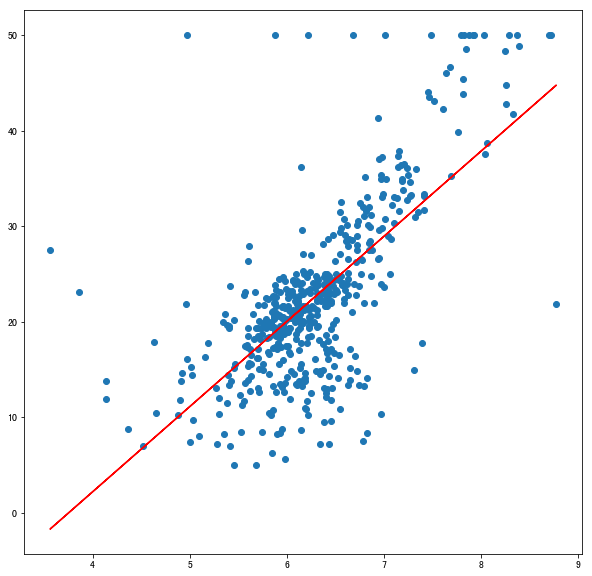

In [153]:
best_y_hat = X_rm * theta_1 + theta_0
print(theta_1, theta_0)
plt.figure(figsize=(10,10))
plt.scatter(X_rm, Y)
plt.plot(X_rm, best_y_hat, color='red')
plt.show()

### 初始化几个问题：
* theta_0, theta_1的初始值选择
* 学习速率的选择
* 线性方程函数，。。。其他函数方程
* 代价函数的选择

## 4.Gradient descent with abs loss function

In [164]:
# %%time
learning_rate = 1 / 10000
theta_0 = 100
theta_1 = 100
min_loss = float('inf')
update_count = 0
flag = 1

while flag:
    if update_count % 10000 == 0:
            print(f"{update_count} iteration: with loss {min_loss} : theta_1 = {theta_1}, theta_0 = {theta_0}") 
    update_count += 1
    y_hat = X_rm * theta_1 + theta_0
    current_loss = np.sum(np.abs(Y - y_hat)) / len(Y)
    
    if min_loss > current_loss:
        flag = 0 if min_loss - current_loss < .0001 else 1
        min_loss = current_loss    
        
    theta_1 = theta_1 - learning_rate * np.sum(X_rm) / len(Y)
    theta_0 = theta_0 - learning_rate * np.sum(X_rm) / len(Y)
print(f"{update_count} iterations to get best theta with theta_1 = {theta_1} theta_0 = {theta_0}")

0 iteration: with loss inf : theta_1 = 100, theta_0 = 100
10000 iteration: with loss 660.1539467677917 : theta_1 = 93.71536561270091, theta_0 = 93.71536561270091
20000 iteration: with loss 614.3726829981393 : theta_1 = 87.43073122540181, theta_0 = 87.43073122540181
30000 iteration: with loss 568.5914192284868 : theta_1 = 81.14609683810272, theta_0 = 81.14609683810272
40000 iteration: with loss 522.8101554588344 : theta_1 = 74.86146245080363, theta_0 = 74.86146245080363
50000 iteration: with loss 477.02889168918193 : theta_1 = 68.57682806350454, theta_0 = 68.57682806350454
60000 iteration: with loss 431.2476279193889 : theta_1 = 62.29219367618613, theta_0 = 62.29219367618613
70000 iteration: with loss 385.46636414921875 : theta_1 = 56.00755928881598, theta_0 = 56.00755928881598
80000 iteration: with loss 339.6851003790488 : theta_1 = 49.722924901445836, theta_0 = 49.722924901445836
90000 iteration: with loss 293.90383660887875 : theta_1 = 43.43829051407569, theta_0 = 43.43829051407569
1

3.0280914034127573 3.0280914034127573


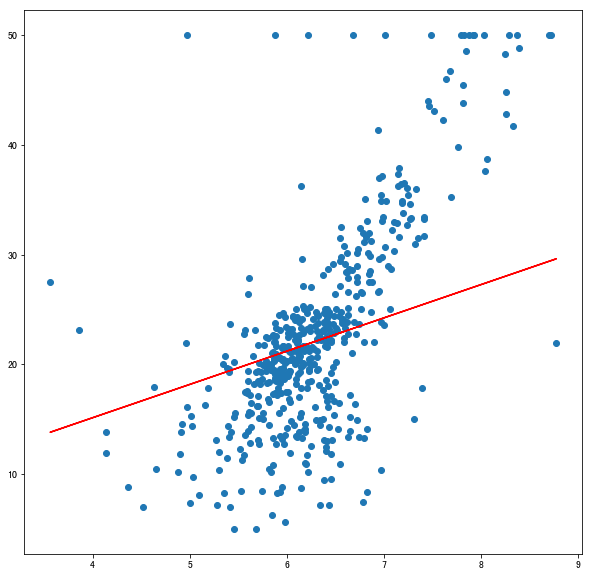

In [165]:
best_y_hat = X_rm * theta_1 + theta_0
print(theta_1, theta_0)
plt.figure(figsize=(10,10))
plt.scatter(X_rm, Y)
plt.plot(X_rm, best_y_hat, color='red')
plt.show()

## 5.Dynamic Programming
* Overlapping subproblems
* Overlapping computing saved in a table
* Parse solution

> 重新解决w2的地铁路径搜索问题

In [1]:
original_price = [1, 5, 8, 9, 10, 17, 17, 20, 24, 30, 35]

In [2]:
from collections import defaultdict
from functools import lru_cache
price = defaultdict(int)
for i, p in enumerate(original_price):
    price[i + 1] = p
price[11]

35

In [41]:
call_time_with_args = defaultdict(int)
solution = {}
@get_call_count(call_time_with_args)
@memo
@lru_cache(maxsize=128)
def get_max_price(n):
    """
    Return optimun of the combination.
    """
    max_price, max_split = max(
        [(price[n], 0)] + [(get_max_price(i) + get_max_price(n-i), i) for i in range(1, n)], key=lambda x: x[0]
    )
    solution[n] = (n - max_split, max_split)
    return max_price

# Best substructure
def parse_solution(n):
    left_split, right_split = solution[n]
    if not right_split: return [left_split]
    return parse_solution(left_split) + parse_solution(right_split)


In [20]:
get_max_price(235)

745

In [32]:
float('-inf') < float('inf')

True

In [9]:
parse_solution(234)

[11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 11,
 3]

In [ ]:
call_time_with_args

In [ ]:
from collections import Counter
Counter(call_count_with_args).most_common()

### Decorator

In [4]:
from functools import wraps
def get_call_count(call_count_dict):
    def get_function_call_count(f):
        @wraps(f)
        def wrap(*args):
            """
            This is wrap.
            """
            result = f(*args)
            call_count_dict[(f.__name__, args)] += 1
            return result
        return wrap
    return get_function_call_count

In [ ]:
call_count_add = defaultdict(int)
@get_call_count(call_count_add)
def add_ten(n):
    return n + 10

In [ ]:
add_ten(13)

In [ ]:
call_count_add

In [5]:
def memo(f):
    cache = {}
    @wraps(f)
    def _wrap(*args):
        result = None
        if args in cache:
            result = cache[args]
        else:
            result = f(*args)
            cache[args] = result
        return result
    return _wrap